/tmp/ipykernel_140280/1535811599.py:18: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  "SElasticTransform": A.ElasticTransform(alpha=80, sigma=6, alpha_affine=4, p=1.0),


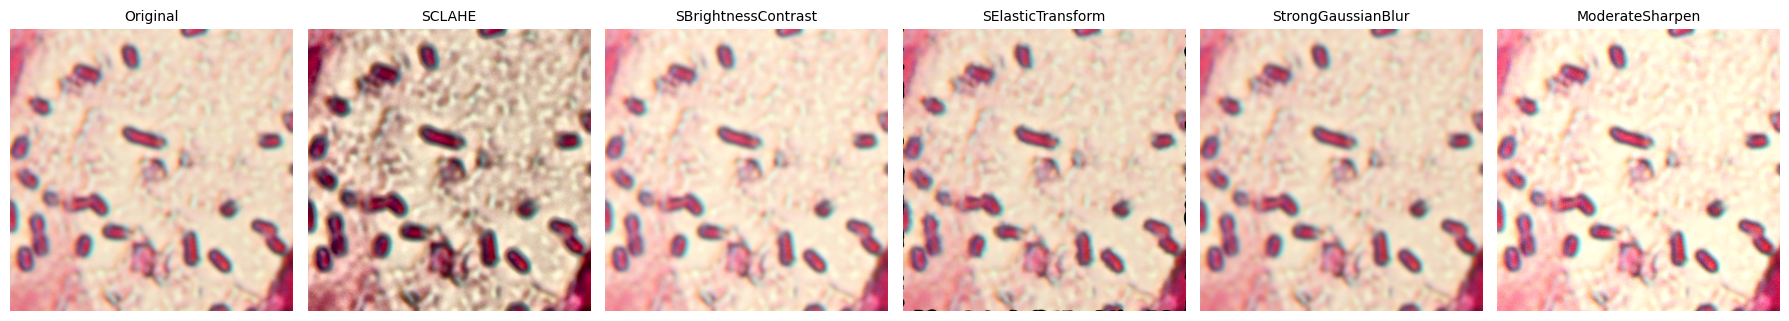

In [5]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np

# Load image
image_path = "test.jpg"  # change this to your filename if needed
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"File not found: {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define augmentations
augmentations = {
    "Original": None,
    "CLAHE": A.CLAHE(clip_limit=3.0, tile_grid_size=(8, 8), p=1.0),
    "BrightnessContrast": A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=1.0),
    "ElasticTransform": A.ElasticTransform(alpha=80, sigma=6, alpha_affine=4, p=1.0),
    "GaussianBlurStrong": A.GaussianBlur(blur_limit=(11, 15), p=1.0),
    "SharpenModerate": A.Sharpen(alpha=(0.5, 0.7), lightness=(1.1, 1.3), p=1.0),
}

# Apply augmentations
results = {"Original": image}
for name, aug in augmentations.items():
    if name == "Original":
        continue
    results[name] = aug(image=image)["image"]

# Display results
plt.figure(figsize=(18, 6))
for i, (name, img) in enumerate(results.items()):
    plt.subplot(1, len(results), i + 1)
    plt.imshow(img)
    plt.title(name, fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()
